In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.__version__

'1.3.1'

In [3]:
data = pd.read_csv('./data/election.csv.tar.xz',compression='xz')
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001732 entries, 0 to 1001731
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   election.csv       1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

,election.csv,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166.0
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166.0
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073.0
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073.0
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166.0
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190.0,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166.0
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166.0
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073.0
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725.0,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166.0
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865.0,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166.0


## **unique political candidates**

In [4]:
unique_cands = data.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick', nan], dtype=object)

## **indicate party affiliation**

In [5]:
parties = {'Bachmann, Michelle': 'Republican',
'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican',
'Huntsman, Jon': 'Republican',
'Johnson, Gary Earl': 'Republican',
'McCotter, Thaddeus G': 'Republican',
'Obama, Barack': 'Democrat',
'Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican',
'Perry, Rick': 'Republican',
"Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican',
'Santorum, Rick': 'Republican'}

data['party'] = data.cand_nm.map(parties)
data['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

## **restrict the dataset to positive contributions**

In [6]:
data = data[data.contb_receipt_amt > 0]

## **filter main two candidates**

In [7]:
data_mrbo = data[data.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## **contribution by occupation**

In [8]:
data.contbr_occupation.value_counts().head(10)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

## **modify some occupations and employers unknown values**

In [9]:
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO'}
data.contbr_occupation = data.contbr_occupation.map(lambda x:occ_mapping.get(x,x))

emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED'}
data.contbr_employer = data.contbr_employer.map(lambda x:emp_mapping.get(x,x))

## **aggregate the data by party and occupation**

In [10]:
by_occupation = data.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


## **filter occupations that donated at least $2 million**

In [11]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


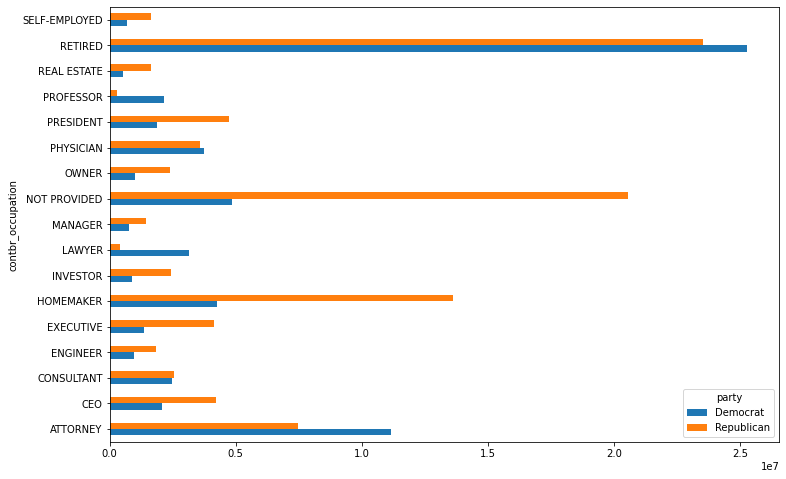

In [13]:
over_2mm.plot(kind='barh',figsize=(12,8) )

## **top donor occupations or top companies that donated to Obama and Romney**

In [12]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

grouped = data_mrbo.groupby('cand_nm')
print(grouped.apply(get_top_amounts, 'contbr_occupation', n=7))
print('-'*70)
print(grouped.apply(get_top_amounts, 'contbr_employer', n=10))

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

## **Bucketing Donation Amounts**

In [13]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(data_mrbo.contb_receipt_amt, bins)
grouped = data_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


## **bucket sum**

In [14]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
print(normed_sums)
# normed_sums[:-2].plot(kind='barh')

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000      0.000000
(1000000, 10000000]       1.000000      0.000000


In [15]:
normed_sums.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674


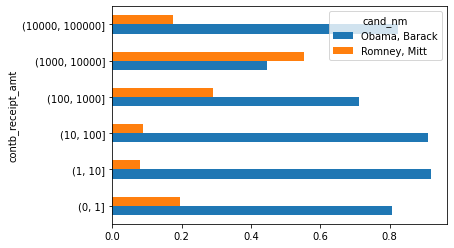

In [17]:
normed_sums[:-2].plot(kind='barh')

## **Donation Statistics by State**

In [18]:
grouped = data_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [19]:
percent = totals.div(totals.sum(1), axis=0)
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
